<a href="https://colab.research.google.com/github/nikhomgithub/tfSciPy2018/blob/master/big_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2019-09-11 12:27:57--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.46.221.5, 2600:140b:a000:38e::e59, 2600:140b:a000:390::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.46.221.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   180MB/s    in 4.2s    

2019-09-11 12:28:06 (186 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [3]:
!ls -alh

total 787M
drwxr-xr-x 1 root root 4.0K Sep 11 12:28 .
drwxr-xr-x 1 root root 4.0K Sep 11 12:26 ..
drwxr-xr-x 1 root root 4.0K Sep  9 16:05 .config
-rw-r--r-- 1 root root 787M Oct 13  2018 kagglecatsanddogs_3367a.zip
drwxr-xr-x 1 root root 4.0K Aug 27 16:17 sample_data


In [0]:
import os
import zipfile

local_zip = 'kagglecatsanddogs_3367a.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
!ls /tmp/PetImages

Cat  Dog


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR="/tmp/PetImages"

CATEGORIES=["Dog","Cat"]
img_size=150

def create_training_data():
    for i in CATEGORIES:
        path=os.path.join(DATADIR,i)#print(path)
        class_num=CATEGORIES.index(i)
        for img in os.listdir(path):
            try:
                img_path=os.path.join(path,img)

                img_array=cv2.imread(img_path)
                
                #img_array=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
                
                new_array=cv2.resize(img_array,(img_size,img_size))
                
                cv2.imwrite(img_path, new_array)
                
                #training_data.append([new_array,class_num])

                #print(new_array)
                #print(new_array.shape)
                #plt.imshow(new_array,cmap="gray")
                #plt.show()
                #break
            #break
            
            except Exception as e:
                pass

create_training_data()

In [0]:
!cd /tmp/PetImages

In [0]:
!mkdir /tmp/validation

In [0]:
!mkdir /tmp/validation/cats

In [0]:
!mkdir /tmp/validation/dogs

In [0]:
!bash -c 'mv /tmp/PetImages/Cat/{0..1000}.jpg /tmp/validation/cats'
!bash -c 'mv /tmp/PetImages/Dog/{0..1000}.jpg /tmp/validation/dogs'

In [15]:
!ls /tmp/validation/cats

0.jpg	  212.jpg  326.jpg  43.jpg   553.jpg  667.jpg  780.jpg	894.jpg
1000.jpg  213.jpg  327.jpg  440.jpg  554.jpg  668.jpg  781.jpg	895.jpg
100.jpg   214.jpg  328.jpg  441.jpg  555.jpg  669.jpg  782.jpg	896.jpg
101.jpg   215.jpg  329.jpg  442.jpg  556.jpg  66.jpg   783.jpg	897.jpg
102.jpg   216.jpg  32.jpg   443.jpg  557.jpg  670.jpg  784.jpg	898.jpg
103.jpg   217.jpg  330.jpg  444.jpg  558.jpg  671.jpg  785.jpg	899.jpg
104.jpg   218.jpg  331.jpg  445.jpg  559.jpg  672.jpg  786.jpg	89.jpg
105.jpg   219.jpg  332.jpg  446.jpg  55.jpg   673.jpg  787.jpg	8.jpg
106.jpg   21.jpg   333.jpg  447.jpg  560.jpg  674.jpg  788.jpg	900.jpg
107.jpg   220.jpg  334.jpg  448.jpg  561.jpg  675.jpg  789.jpg	901.jpg
108.jpg   221.jpg  335.jpg  449.jpg  562.jpg  676.jpg  78.jpg	902.jpg
109.jpg   222.jpg  336.jpg  44.jpg   563.jpg  677.jpg  790.jpg	903.jpg
10.jpg	  223.jpg  337.jpg  450.jpg  564.jpg  678.jpg  791.jpg	904.jpg
110.jpg   224.jpg  338.jpg  451.jpg  565.jpg  679.jpg  792.jpg	905.jpg
111.jpg   225

In [16]:
!ls /tmp/validation/dogs

0.jpg	  212.jpg  326.jpg  43.jpg   553.jpg  667.jpg  780.jpg	894.jpg
1000.jpg  213.jpg  327.jpg  440.jpg  554.jpg  668.jpg  781.jpg	895.jpg
100.jpg   214.jpg  328.jpg  441.jpg  555.jpg  669.jpg  782.jpg	896.jpg
101.jpg   215.jpg  329.jpg  442.jpg  556.jpg  66.jpg   783.jpg	897.jpg
102.jpg   216.jpg  32.jpg   443.jpg  557.jpg  670.jpg  784.jpg	898.jpg
103.jpg   217.jpg  330.jpg  444.jpg  558.jpg  671.jpg  785.jpg	899.jpg
104.jpg   218.jpg  331.jpg  445.jpg  559.jpg  672.jpg  786.jpg	89.jpg
105.jpg   219.jpg  332.jpg  446.jpg  55.jpg   673.jpg  787.jpg	8.jpg
106.jpg   21.jpg   333.jpg  447.jpg  560.jpg  674.jpg  788.jpg	900.jpg
107.jpg   220.jpg  334.jpg  448.jpg  561.jpg  675.jpg  789.jpg	901.jpg
108.jpg   221.jpg  335.jpg  449.jpg  562.jpg  676.jpg  78.jpg	902.jpg
109.jpg   222.jpg  336.jpg  44.jpg   563.jpg  677.jpg  790.jpg	903.jpg
10.jpg	  223.jpg  337.jpg  450.jpg  564.jpg  678.jpg  791.jpg	904.jpg
110.jpg   224.jpg  338.jpg  451.jpg  565.jpg  679.jpg  792.jpg	905.jpg
111.jpg   225

              !bash -c 'mv /tmp/PetImages/Cat/{0..1000}.jpg /tmp/validation/cats'
              !ls /tmp/validation/cats
              
              !bash -c 'mv /tmp/PetImages/Dog/{0..1000}.jpg /tmp/validation/dogs'
              !ls /tmp/validation/dogs

In [0]:
base_dir = '/tmp'
train_dir = os.path.join(base_dir, 'PetImages')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'Cat')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'Dog')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [18]:
train_cat_fnames = os.listdir(train_cats_dir)
print (train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print (train_dog_fnames[:10])

['6335.jpg', '5196.jpg', '5285.jpg', '7749.jpg', '9307.jpg', '11568.jpg', '5569.jpg', '11805.jpg', '1067.jpg', '10138.jpg']
['10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg', '10006.jpg', '10007.jpg', '10008.jpg', '10009.jpg']


In [20]:
print ('total training cat images:', len(os.listdir(train_cats_dir)))
print ('total training dog images:', len(os.listdir(train_dogs_dir)))
print ('total validation cat images:', len(os.listdir(validation_cats_dir)))
print ('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 11500
total training dog images: 11500
total validation cat images: 1001
total validation dog images: 1001


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

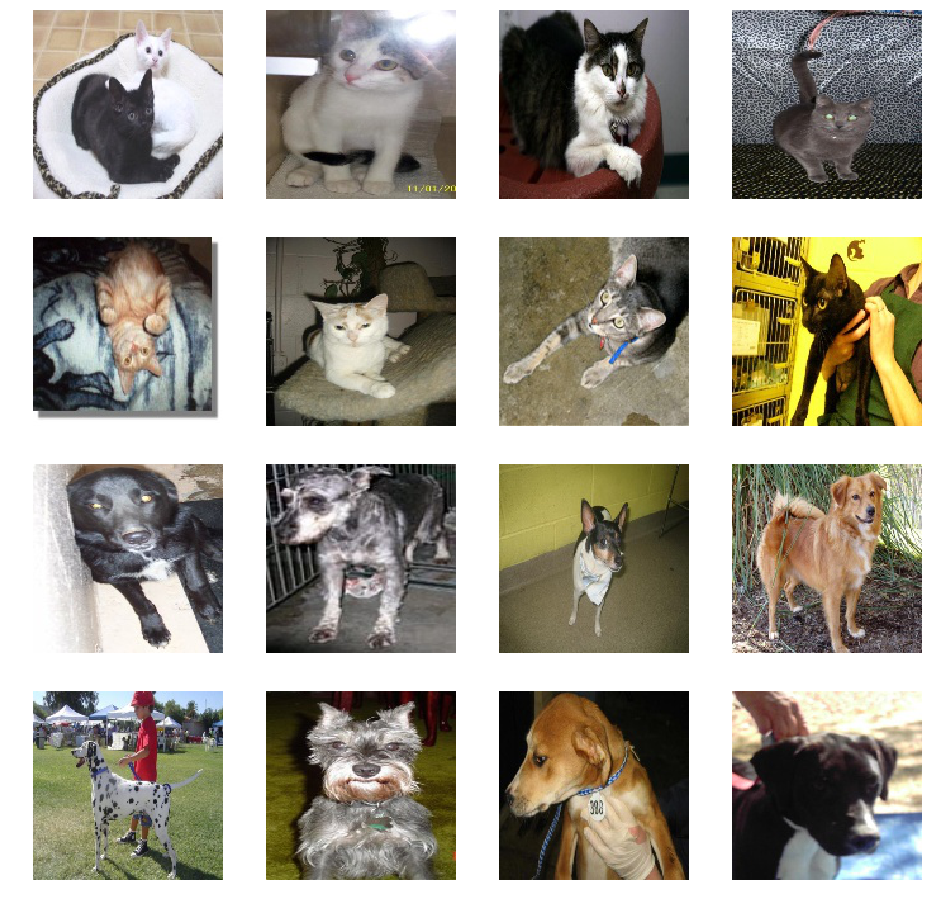

In [22]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 22998 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


In [0]:
!rm /tmp/PetImages/Dog/11702.jpg

In [0]:
!rm /tmp/validation/cats/666.jpg

In [29]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = train_dir
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = validation_dir
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


model.summary()

model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=15, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Found 22997 images belonging to 2 classes.
Found 2001 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
___________________________________

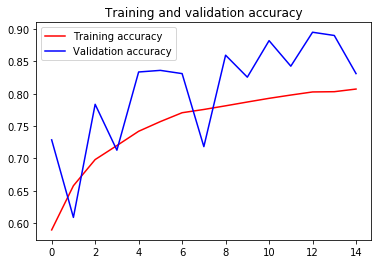

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()